1)Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


# Applying naive bayes for classification

In [ ]:
import pandas as pd
df=pd.read_csv('SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(30161, 14)

In [ ]:
df[df.duplicated()]
df1=df.drop_duplicates()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data=pd.read_csv('SalaryData_Test.csv')
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
data.shape

(15060, 14)

In [ ]:
data[data.duplicated()]
data1=data.drop_duplicates()
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
ds=pd.merge(df1,data1)
ds

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,21,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
3,48,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
4,36,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,61,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1790,45,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
1791,32,Private,Some-college,10,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
1792,33,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [ ]:
ds.info

<bound method DataFrame.info of       age      workclass      education  ...  hoursperweek          native  Salary
0      38        Private        HS-grad  ...            40   United-States   <=50K
1      19        Private        HS-grad  ...            40   United-States   <=50K
2      21        Private   Some-college  ...            40   United-States   <=50K
3      48        Private        HS-grad  ...            40   United-States   <=50K
4      36        Private        HS-grad  ...            40   United-States   <=50K
...   ...            ...            ...  ...           ...             ...     ...
1789   61        Private        7th-8th  ...            40   United-States   <=50K
1790   45   Self-emp-inc      Bachelors  ...            45   United-States    >50K
1791   32        Private   Some-college  ...            40   United-States   <=50K
1792   33        Private        HS-grad  ...            40   United-States   <=50K
1793   57        Private        HS-grad  ...           

In [ ]:
ds.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [ ]:
ds.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000
mean,34.193423,10.133779,153.721293,6.680602,39.541806
std,11.665248,2.044389,2574.128532,115.874107,8.613449
min,17.000000,1.000000,0.000000,0.000000,8.000000
25%,24.000000,9.000000,0.000000,0.000000,40.000000
50%,33.000000,10.000000,0.000000,0.000000,40.000000
75%,42.000000,11.000000,0.000000,0.000000,40.000000
max,67.000000,16.000000,99999.000000,2415.000000,85.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


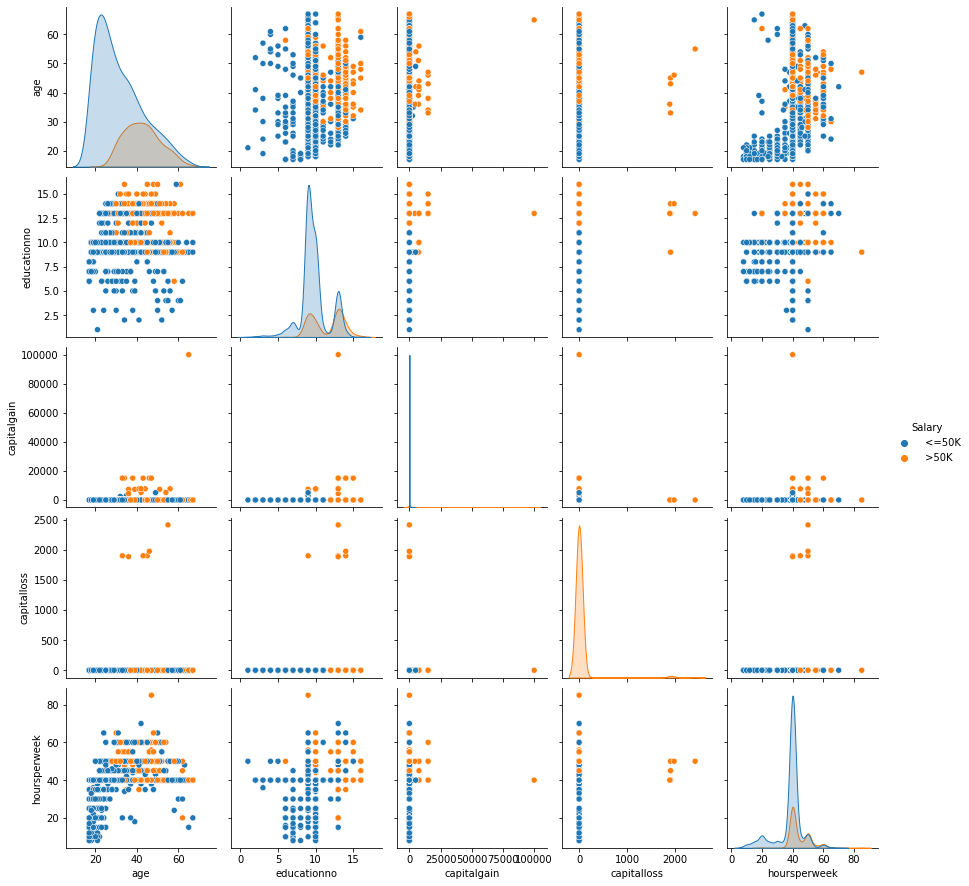

In [ ]:
#Visualization:
import seaborn as sns
sns.pairplot(ds,hue='Salary')

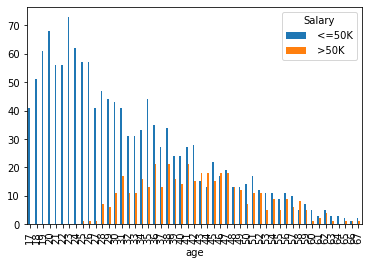

In [ ]:
pd.crosstab(ds.age,ds.Salary).plot(kind="bar")

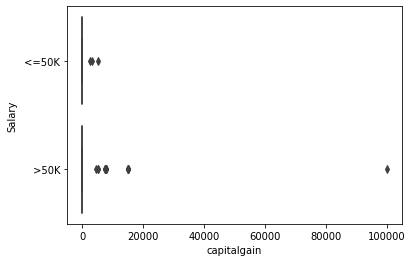

In [ ]:
sns.boxplot(x="capitalgain",y="Salary",data=ds)

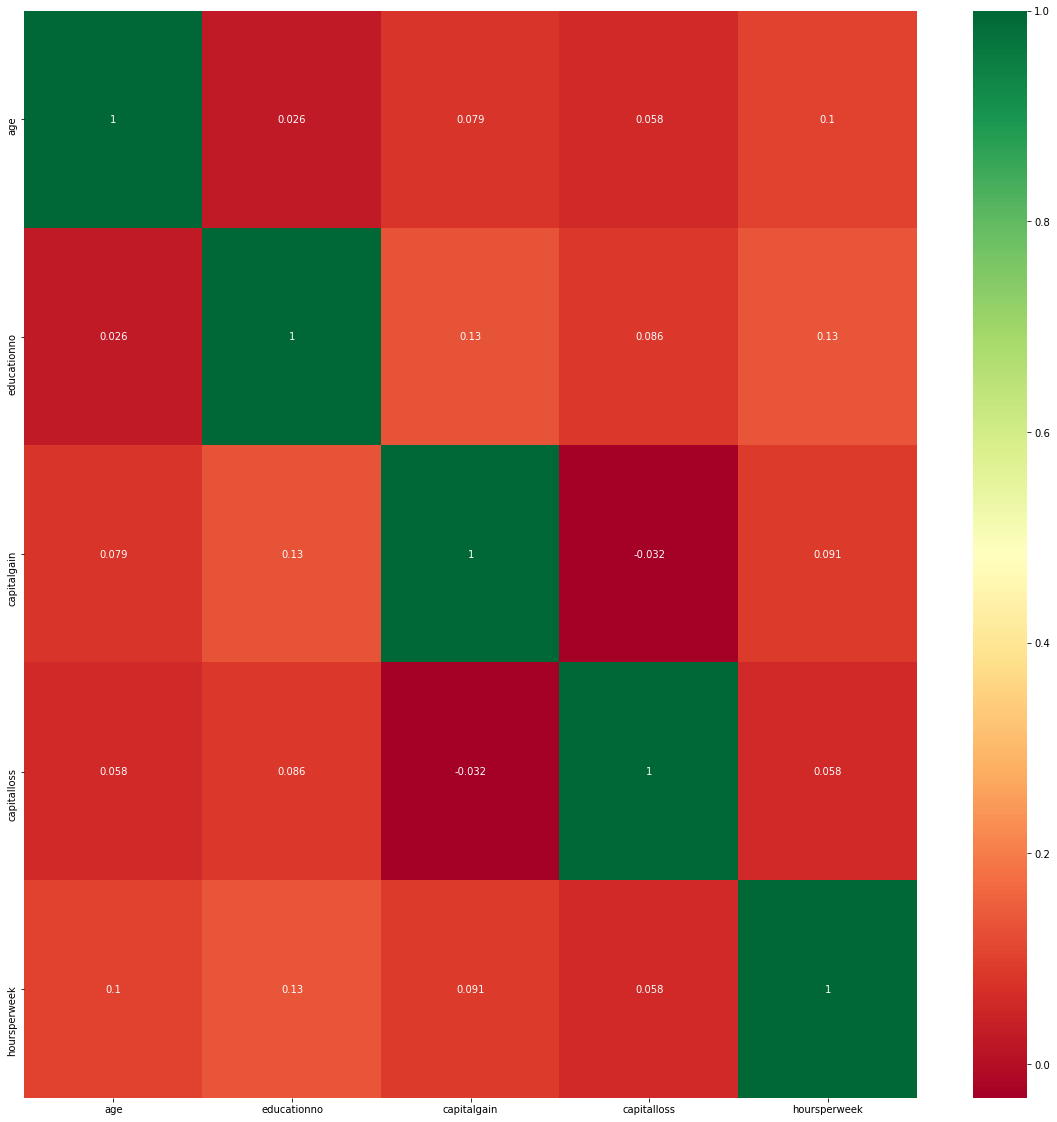

In [ ]:
#Correlation Matrix with Heatmap:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corrmat = ds.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Independent and Dependent features
x=ds.iloc[:,0:13]
y=ds.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_X= LabelEncoder()
X=x.apply(LabelEncoder().fit_transform)

In [ ]:
Y=y.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)
Y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Feature Selection:(apply SelectKBest class to extract top 10 best features)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
featureScores
print(featureScores.nlargest(10,'Score'))  

            Specs        Score
0             age  2196.288122
6    relationship   477.210615
9     capitalgain   373.575175
11   hoursperweek   229.239473
3     educationno   107.431388
10    capitalloss    46.520482
4   maritalstatus    42.802556
8             sex    40.018184
5      occupation     0.599390
1       workclass     0.276296


In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
mnscaler = MinMaxScaler().fit(X)
X = mnscaler.transform(X)


In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=50)

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
clf.score(X_test,y_test)

0.7757166947723441

In [ ]:
#Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB as GB

clf = GB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
clf.score(X_test,y_test)

0.7892074198988196

In [ ]:
#Bernoulli Naive Bayes 
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(binarize=0.5)
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

0.7892074198988196

### Hyperparameter tunning

In [ ]:
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB as GB
clf = GB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
params={
 "priors"    : [None] ,
 "var_smoothing"    : [ 1e-02,1e-04, 1e-05, 1e-09, 1e-015],
 
    
}

In [84]:
rnd = RandomizedSearchCV(estimator=clf,param_distributions=params)
rnd.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'priors': [None],
                                        'var_smoothing': [0.01, 0.0001, 1e-05,
                                                          1e-09, 1e-15]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [85]:
print(rnd.best_score_)
print(rnd.best_params_)

0.7834785615491009
{'var_smoothing': 0.0001, 'priors': None}


In [86]:
#Alternative Usage of Saved Model
from sklearn.externals import joblib
joblib.dump(clf, 'NB_spam_model.pkl')
NB_spam_model = open('NB_spam_model.pkl','rb')
clf = joblib.load(NB_spam_model)
clf

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

#other way
 By using naive bayes predicting accuracy on training and testing data seprately.

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
import numpy as np
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)
train_pred_m = classifier_mb.predict(X_train)
accuracy_train_m= np.mean(train_pred_m) 
accuracy_train_m

In [ ]:
test_pred_m = classifier_mb.predict(X_test)
accuracy_test_m = np.mean(test_pred_m)
accuracy_test_m 


In [ ]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(X_train,y_train) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(X_train)
accuracy_train_g = np.mean(train_pred_g)
accuracy_train_g

In [ ]:
test_pred_g = classifier_gb.predict(X_test)
accuracy_test_g = np.mean(test_pred_g) # 8%
accuracy_test_g

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier_nb = BernoulliNB()
classifier_nb.fit(X_train,y_train)
train_pred_b = classifier_nb.predict(X_train)
accuracy_train_b = np.mean(train_pred_b)
accuracy_train_b

In [ ]:
test_pred_b= classifier_gb.predict(X_test)
accuracy_test_b = np.mean(test_pred_b) # 8%
accuracy_test_b